<a href="https://colab.research.google.com/github/708i/HAIT_teamB/blob/master/CNN_apples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
import os
os.chdir('/content/gdrive/My Drive/Colab Notebooks/')
!pwd

/content/gdrive/My Drive/Colab Notebooks


In [0]:
'''
import zipfile
with zipfile.ZipFile('./fruits_f_r.zip') as zf:
  zf.extractall()
  '''

In [0]:
import numpy as np
import cv2
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
TRAIN_f = './dataset/train/freshapples/'
TRAIN_r = './dataset/train/rottenapples/'
TEST_f = './dataset/test/freshapples/'
TEST_r = './dataset/test/rottenapples/'

train_f = [TRAIN_f+i for i in os.listdir(TRAIN_f)]
train_r = [TRAIN_r+i for i in os.listdir(TRAIN_r)]
test_f = [TEST_f+i for i in os.listdir(TEST_f)]
test_r = [TEST_r+i for i in os.listdir(TEST_r)]

In [0]:
train_images = train_f + train_r
test_images = test_f + test_r
random.shuffle(train_images)
random.shuffle(test_images)

In [0]:
ROWS = 128
COLS = 128
CHANNELS = 3

def read_image(file_path):
    img = cv2.imread(file_path, cv2.IMREAD_COLOR)
    return cv2.resize(img, (ROWS, COLS), interpolation=cv2.INTER_CUBIC)


def prep_data(images):
    count = len(images)
    data = np.ndarray((count,CHANNELS,ROWS,COLS), dtype=np.uint8)

    for i, image_file in enumerate(images):
        image = read_image(image_file)
        data[i] = image.T
        if i%250 == 0: print('Processed {} of {}'.format(i, count))
    
    return data

In [0]:
test = prep_data(test_images)
train = prep_data(train_images)

Processed 0 of 996
Processed 25 of 996
Processed 50 of 996
Processed 75 of 996
Processed 100 of 996
Processed 125 of 996
Processed 150 of 996
Processed 175 of 996
Processed 200 of 996
Processed 225 of 996
Processed 250 of 996
Processed 275 of 996
Processed 300 of 996
Processed 325 of 996
Processed 350 of 996
Processed 375 of 996
Processed 400 of 996
Processed 425 of 996
Processed 450 of 996
Processed 475 of 996
Processed 500 of 996
Processed 525 of 996
Processed 550 of 996
Processed 575 of 996
Processed 600 of 996
Processed 625 of 996
Processed 650 of 996
Processed 675 of 996
Processed 700 of 996
Processed 725 of 996
Processed 750 of 996
Processed 775 of 996
Processed 800 of 996
Processed 825 of 996
Processed 850 of 996
Processed 875 of 996
Processed 900 of 996
Processed 925 of 996
Processed 950 of 996
Processed 975 of 996
Processed 0 of 4035
Processed 25 of 4035
Processed 50 of 4035
Processed 75 of 4035
Processed 100 of 4035
Processed 125 of 4035
Processed 150 of 4035
Processed 175 of

In [0]:
labels = []
for i in train_images:
  if 'rotten' in i:
    labels.append(1)
  else:
    labels.append(0)
    
test_labels = []
for i in test_images:
  if 'rotten' in i:
    test_labels.append(1)
  else:
    test_labels.append(0)

In [0]:
labels[:10]

[0, 1, 1, 0, 0, 0, 1, 1, 0, 1]

In [0]:
train_images[:10]

['./dataset/test/freshapples/rotated_by_60_Screen Shot 2018-06-08 at 5.18.58 PM.png',
 './dataset/test/rottenapples/rotated_by_45_Screen Shot 2018-06-08 at 2.31.16 PM.png',
 './dataset/test/rottenapples/rotated_by_60_Screen Shot 2018-06-07 at 2.40.28 PM.png',
 './dataset/test/freshapples/rotated_by_45_Screen Shot 2018-06-08 at 5.20.51 PM.png',
 './dataset/test/freshapples/vertical_flip_Screen Shot 2018-06-08 at 5.29.18 PM.png',
 './dataset/test/freshapples/Screen Shot 2018-06-08 at 5.13.25 PM.png',
 './dataset/test/rottenapples/saltandpepper_Screen Shot 2018-06-08 at 2.51.28 PM.png',
 './dataset/test/rottenapples/rotated_by_30_Screen Shot 2018-06-07 at 2.23.02 PM.png',
 './dataset/test/freshapples/rotated_by_60_Screen Shot 2018-06-08 at 5.25.54 PM.png',
 './dataset/test/rottenapples/Screen Shot 2018-06-08 at 2.43.54 PM.png']

In [0]:
from keras.models import Sequential 
from keras.layers import Input, Dropout, Flatten, Conv2D, MaxPooling2D, Dense, Activation
from keras.optimizers import Adam
from keras.callbacks import Callback,EarlyStopping
from keras.utils import np_utils

In [0]:
optimizer = Adam()
objective = 'binary_crossentropy'


def fr():
    
    model = Sequential()

    model.add(Conv2D(32, (3, 3), padding='same', input_shape=(3, ROWS, COLS), activation='relu'))
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(data_format='channels_first',pool_size=(2, 2)))

    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(data_format='channels_first',pool_size=(2, 2)))
    
    model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(data_format='channels_first',pool_size=(2, 2)))
    
    model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(data_format='channels_first',pool_size=(2, 2)))
    
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(1))
    model.add(Activation('sigmoid'))

    model.compile(loss=objective, optimizer=optimizer, metrics=['accuracy'])
    return model


model = fr()

In [0]:
model.compile(loss=objective,
              optimizer=optimizer,
              metrics=['accuracy'])

# ミニバッチに含まれるサンプル数を指定
batch_size = 500

# epoch数を指定
n_epoch = 100

In [0]:
hist = model.fit(train,
                 labels,
                 epochs=n_epoch,
                 validation_split=0.25,
                 verbose=1,
                 shuffle=True,
                 batch_size=batch_size)

Train on 3026 samples, validate on 1009 samples
Epoch 1/100
3026/3026 [==============================] - 1s 469us/step - loss: 0.2985 - acc: 0.8939 - val_loss: 0.3905 - val_acc: 0.8771
Epoch 2/100
3026/3026 [==============================] - 1s 432us/step - loss: 0.2930 - acc: 0.8903 - val_loss: 0.2552 - val_acc: 0.9078
Epoch 3/100
3026/3026 [==============================] - 1s 432us/step - loss: 0.2341 - acc: 0.9174 - val_loss: 0.2440 - val_acc: 0.9167
Epoch 4/100
3026/3026 [==============================] - 1s 435us/step - loss: 0.2143 - acc: 0.9227 - val_loss: 0.2496 - val_acc: 0.9187
Epoch 5/100
3026/3026 [==============================] - 1s 433us/step - loss: 0.2047 - acc: 0.9237 - val_loss: 0.2278 - val_acc: 0.9207
Epoch 6/100
3026/3026 [==============================] - 1s 431us/step - loss: 0.1939 - acc: 0.9280 - val_loss: 0.2352 - val_acc: 0.9148
Epoch 7/100
3026/3026 [==============================] - 1s 433us/step - loss: 0.1983 - acc: 0.9250 - val_loss: 0.2142 - val_acc: 

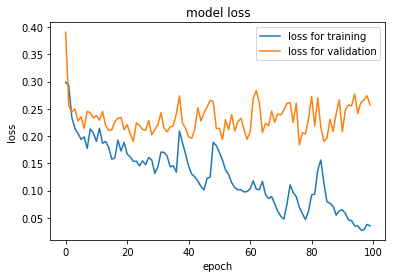

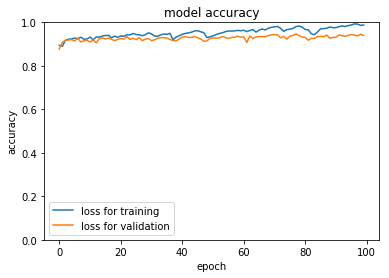

In [0]:
def plot_history_loss(hist):
    # 損失値(Loss)の遷移のプロット
    plt.plot(hist.history['loss'],label="loss for training")
    plt.plot(hist.history['val_loss'],label="loss for validation")
    plt.title('model loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(loc='best')
    plt.show()

def plot_history_acc(hist):
    # 精度(Accuracy)の遷移のプロット
    plt.plot(hist.history['acc'],label="loss for training")
    plt.plot(hist.history['val_acc'],label="loss for validation")
    plt.title('model accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend(loc='best')
    plt.ylim([0, 1])
    plt.show()

plot_history_loss(hist)
plot_history_acc(hist)

In [0]:
prediction = model.predict(test)

In [0]:
predict_labels = []
for i in range(len(test)):
  if prediction[i]>0.5:
    predict_labels.append(1)
  else:
    predict_labels.append(0)

In [0]:
from sklearn import metrics
print('accuracy: %.3f' % metrics.accuracy_score(test_labels, predict_labels))
print('recall: %.3f' % metrics.recall_score(test_labels, predict_labels))
print('precison: %.3f' % metrics.precision_score(test_labels, predict_labels))
print('f1_score: %.3f' % metrics.f1_score(test_labels, predict_labels))

accuracy: 0.938
recall: 0.927
precison: 0.969
f1_score: 0.947


This is 99.00% fresh


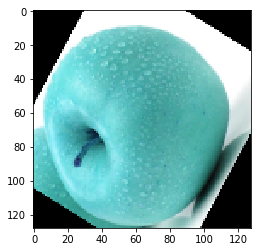

This is 87.91% rotten


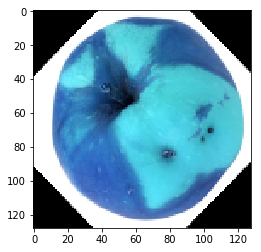

This is 94.45% rotten


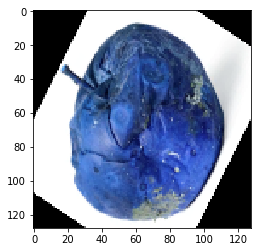

This is 62.32% fresh


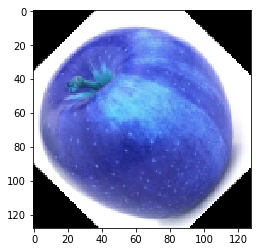

This is 99.84% fresh


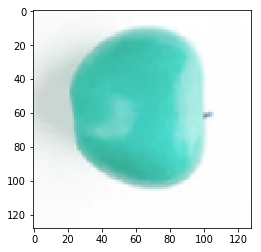

In [0]:
for i in range(5):
  if prediction[i]>0.5:
    print('This is {:.2%} fresh'.format(prediction[i][0]))
  else:
    print('This is {:.2%} rotten'.format(1-prediction[i][0]))
  #img = test[i]
  #img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  plt.imshow(test[i].T)
  plt.show()